In [10]:
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt

In [11]:
data_dir = '.'
classes = os.listdir(data_dir + '/Training')
print(classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [12]:
train_dataset = ImageFolder(data_dir + "/Training", transform=tt.ToTensor())
print(train_dataset)
test_dataset = ImageFolder(data_dir + "/Test", transform=tt.ToTensor())
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 67692
    Root location: ./Training
    StandardTransform
Transform: ToTensor()
Dataset ImageFolder
    Number of datapoints: 22688
    Root location: ./Test
    StandardTransform
Transform: ToTensor()


tensor(99)
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50,

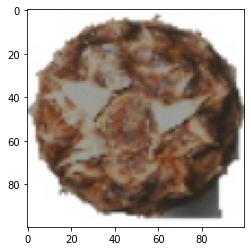

In [13]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
for images, labels in dataloader:
    print(labels[0])
    print(train_dataset.class_to_idx)
    print(train_dataset.classes[labels[0]])
    plt.imshow(images[0].permute(1, 2, 0))
    break

In [14]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        ######################################################################
        #### DESIGN LAYERS :
        ### SEQUENCE: CONV1,ACTIVATION1,POOLING1,  CONV2,ACTIVATION2,POOLING2, LINEAR(FC)
        self.layer1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.layer2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.pool2 = nn.MaxPool2d(4)
        self.layer3 = nn.Linear(32 * 11 * 11, len(classes))

    def forward(self, x):
        # COMBINE LAYERS
        ## 1) CONV1
        out = self.layer1(x)
        ## 2) ACTIVATION1
        out = self.relu(out)
        ## 3) POOLING1
        out = self.pool1(out)
        ## 4) CONV2
        out = self.layer2(out)
        ## 5) ACTIVATION2
        out = self.relu(out)
        ## 6) POOLING2
        out = self.pool2(out)
        ## 7) flatten ########## DURING LAB WE JUST FORGOT FOLLOWING FLATTEN LAYER ###############
        out = out.view(out.size(0), -1)
        ## 8) LINEAR(FC)
        return self.layer3(out)


# batch_size, epoch and iteration
batch_size = 100
num_epochs = (len(train_dataset.samples) / batch_size)
num_epochs = int(num_epochs)

# data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for i, (images, labels) in enumerate(train_loader):

    train = images

    # Clear gradients
    optimizer.zero_grad()

    # Forward propagation
    outputs = model(train)

    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    if count % 50 == 0:
        # Calculate Accuracy
        correct = 0
        total = 0
        # Iterate through test dataset
        for images, labels in test_loader:
            test = images

            # Forward propagation
            outputs = model(test)

            # Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]

            # Total number of labels
            total += len(labels)

            correct += (predicted == labels).sum()

        accuracy = 100 * correct / float(total)

        # store loss and iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
        if count == 500:
            break

Iteration: 50  Loss: 4.457866668701172  Accuracy: 3.57016921043396 %
Iteration: 100  Loss: 4.275110244750977  Accuracy: 1.33991539478302 %
Iteration: 150  Loss: 3.224095344543457  Accuracy: 18.899858474731445 %
Iteration: 200  Loss: 2.0562191009521484  Accuracy: 33.00423049926758 %
Iteration: 250  Loss: 2.396254777908325  Accuracy: 42.5952033996582 %
Iteration: 300  Loss: 1.5190714597702026  Accuracy: 55.07316589355469 %
Iteration: 350  Loss: 0.5599082708358765  Accuracy: 66.80183410644531 %
Iteration: 400  Loss: 0.5086555480957031  Accuracy: 69.64915466308594 %
Iteration: 450  Loss: 0.3024336099624634  Accuracy: 75.91678619384766 %
Iteration: 500  Loss: 0.11863365769386292  Accuracy: 76.8996810913086 %


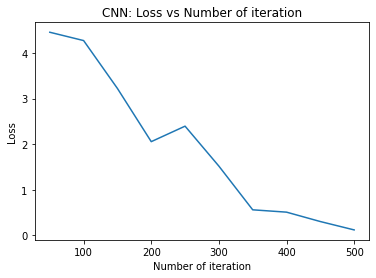

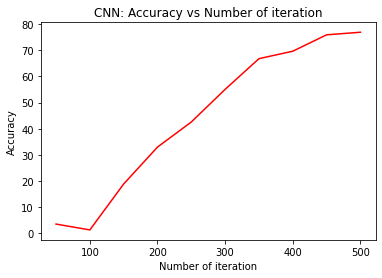

In [16]:
# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list, accuracy_list, color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()